# Linear Regression Health Costs Calculator (freeCodeCamp Assignment)
You will be working on this project with Google Colaboratory.

After going to that link, create a copy of the notebook either in your own account or locally. Once you complete the project and it passes the test (included at that link), submit your project link below. If you are submitting a Google Colaboratory link, make sure to turn on link sharing for "anyone with the link."

We are still developing the interactive instructional content for the machine learning curriculum. For now, you can go through the video challenges in this certification. You may also have to seek out additional learning resources, similar to what you would do when working on a real-world project.
<hr>
In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

- Make sure to convert categorical data to numbers. 
- Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.
- pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.
- Create a model and train it with the train_dataset. 
- Run the final cell in this notebook to check your model. The final cell will use the unseen test_dataset to check how well the model generalizes.

To pass the challenge, model.evaluate must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the test_dataset and graph the results.

In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-11-07 06:22:10--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2022-11-07 06:22:10 (3.85 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Making sure to convert categorical data to numbers

In [4]:
# Reading dataset column's data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Finding unique values in 'sex', 'smoker' & 'region' columns
print("sex unique values:", dataset['sex'].unique())
print("smoker unique values:",dataset['smoker'].unique())
print("region unique values:",dataset['region'].unique())

sex unique values: ['female' 'male']
smoker unique values: ['yes' 'no']
region unique values: ['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
# Converting 'sex', 'smoker' & 'region' columns from categorical to numbers
dataset['sex'].replace({'male': 1, 'female': 0}, inplace=True)
dataset['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)
dataset['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}, inplace=True)
dataset.info()
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,0,3,10600.55
1334,18,0,31.9,0,0,4,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,1,2007.95
1337,61,0,29.1,0,1,3,29141.36


# Use 80% of the data as the train_dataset and 20% of the data as the test_dataset

In [7]:
# Randomly picking 20% of the data as test data
test_dataset = dataset.sample(frac=0.2)
print(len(test_dataset))
test_dataset.head()

268


,age,sex,bmi,children,smoker,region,expenses
829,39,1,21.9,1,0,3,6117.49
660,37,1,46.5,3,0,2,6435.62
233,59,1,27.5,1,0,1,12333.83
533,37,1,36.2,0,0,2,19214.71
1124,23,0,42.8,1,1,4,40904.20


In [8]:
# Now picking the remaining 80% of the data as train data
train_dataset =  dataset[dataset.isin(test_dataset)].dropna()
print(len(train_dataset))
train_dataset.head()

268


,age,sex,bmi,children,smoker,region,expenses
1,18.0,1.0,33.8,1.0,0.0,2.0,1725.55
10,25.0,1.0,26.2,0.0,0.0,4.0,2721.32
16,52.0,0.0,30.8,1.0,0.0,4.0,10797.34
17,23.0,1.0,23.8,0.0,0.0,4.0,2395.17
20,60.0,0.0,36.0,0.0,0.0,4.0,13228.85


In [9]:
# "pop"-ing off expenses column to create train_labels
train_labels = train_dataset.pop("expenses")
train_labels.head()

1      1725.55
10     2721.32
16    10797.34
17     2395.17
20    13228.85
Name: expenses, dtype: float64

In [10]:
# "pop"-ing off expenses column to create test_labels
test_labels = test_dataset.pop("expenses")
test_labels.head()

829      6117.49
660      6435.62
233     12333.83
533     19214.71
1124    40904.20
Name: expenses, dtype: float64

In [11]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
829,39,1,21.9,1,0,3
660,37,1,46.5,3,0,2
233,59,1,27.5,1,0,1
533,37,1,36.2,0,0,2
1124,23,0,42.8,1,1,4


# Creating the model

In [12]:
# Preparing Model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))
model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

# Compiling Model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_________________________________________________________

In [13]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0
)
print(history)

9/9 - 0s - loss: 3467.0251 - mae: 3467.0251 - mse: 41779420.0000 - 80ms/epoch - 9ms/step
Testing set Mean Abs Error: 3467.03 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 8ms/step


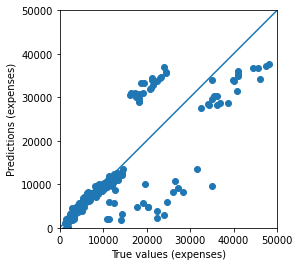

In [14]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
